Intro
-------

So I've written a lot of my code in a separate backend.py file in the same folder and I'm just importing it like a module in order to do the calculations.

The code I've written makes use of classes and methods. The way it works is that one can create an object containing a list of charges which then has methods to work out potential, electric field and potential energy.

The charge_system class can take structures of molecules such as water and position them in 3d space with different orientations. The molecules in this case are just point charges at each atom with partial charge due to dipoles. 

In the below example you can see water being rotated in space when you move the sliders.

In [1]:
from ipywidgets import interact
from backend import *
from numpy import *
import matplotlib.pyplot as plt
import matplotlib as mat
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=[5,5]
plt.rcParams['figure.dpi'] = 100
@interact(rad = (-1,1,0.1),x_rot=(-pi,pi, pi/12),y_rot=(-pi,pi, pi/12),z_rot=(-pi,pi, pi/12))
def example(rad = 0, x_rot = 0, y_rot = 0, z_rot = 0):
    box = charge_system([])
    box.water(radius = rad, x_angle = x_rot,y_angle = y_rot, z_angle = z_rot, centre = [0, 0, 0])
    plot_charges(box, s = 2)

interactive(children=(FloatSlider(value=0.0, description='rad', max=1.0, min=-1.0), FloatSlider(value=0.0, des…

In [2]:
print("potential at (0,0,0) A with a charge 1e at (1,1,1) A =", str(charge_system([charge([1,1,1], 1)]).potential([0,0,0]))[:4], "V")

potential at (0,0,0) A with a charge 1e at (1,1,1) A = 8.31 V


Charges around a ring
---------------
Here is a ring of positive charges surrounding a negative charge. There is a plot and a fun interactive slider.
Radius of the ring is one angstrom. Charges are all magnitude 1e C. The charges are unbound for n > 4, which is the same as my analytical solution.

In [9]:
plt.rcParams['figure.figsize']=[5,5]
@interact(n = (0, 10, 1))
def ring(n = 4):
    x, y = [], []
    for j in range(11):
        a = []
        for i in range(j):
            angle = i*2*pi/j
            a.append(charge([sin(angle), cos(angle), 0], 1))
        a.append(charge([0,0,0], -1))
        x.append(j), y.append(charge_system(a).potential_energy())
    plt.plot(x,array(y)/1.602e-19, marker = "x", linestyle = "")
    plt.plot([0,10], [0,0], color = "grey")
    plt.ylabel("Energy in eV"), plt.xlabel("number of positive charges in the ring")
    ring_list, n = [], int(n)
    r = 1 #radius of the circle
    q = 1 #total charge of the circle
    for i in range(n):
        angle = i*2*pi/n
        ring_list.append(charge([sin(angle), cos(angle), 0], q, colour = "blue"))
    ring_system = charge_system(ring_list)
    ring_system.charges.append(charge([0,0,0], -1, colour = "r"))
    eng = ring_system.potential_energy()
    print("Potential energy of system =", "%.3e" % eng , "J")
    plt.plot(n, eng/1.602e-19, color = "red", marker = "o", linestyle = "")
    plot_charges(ring_system, s=2)

interactive(children=(IntSlider(value=4, description='n', max=10), Output()), _dom_classes=('widget-interact',…

Testing my electric field function
---------------------------------
Below I've defined a system of tow point charges separated by 2 Angstroms in the x axis and I'm finding the electric field at z positions. I have plotted my analytical pen and paper solution to the problem and the solution from my potential energy funciton. The two graphs overlap which means that at least the magnitude of my electric field vector is what I want. 

(Text(0, 0.5, 'Electric field magnitude in $NC^{-1}$'),
 Text(0.5, 0, 'Z in Angstroms'))

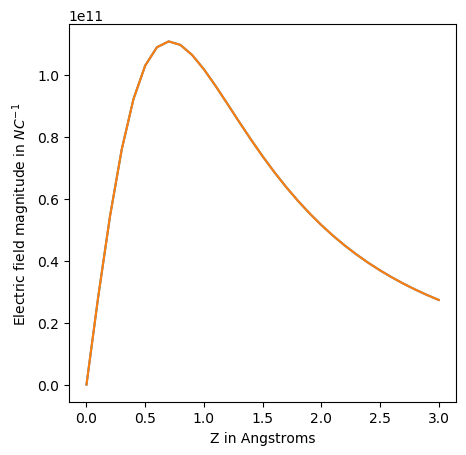

In [4]:
test = charge_system([charge([-1, 0, 0], 1), charge([1, 0, 0], 1)])
analytical = lambda r: (2*1.602e-19*r*1e-10)/(4*pi*e0*(1e-20+(r*1e-10)**2)**(3/2))
x = linspace(0,3,31)
y = [test.electric_field([0,0,i])[1] for i in x.tolist()]
plt.plot(x, y)
plt.plot(x, analytical(x))
plt.ylabel("Electric field magnitude in $NC^{-1}$"), plt.xlabel("Z in Angstroms")

Electric field of a charged ring
-----------------

The electric field calculated here is equal to the calculated magnetic field using the formula derived using Gauss's law:

$$E = \frac{QD}{4\pi\epsilon_{0}(D^{2}+R^{2})^{\frac{3}{2}}}$$
Where D is the distance from the centre of the circle along the normal to the plane of the circle. R is the radius of the circle, Q is the total charge of the circle.

Here the total charge in the ring is 1e C. Comparing the electric field due to the ring with the potential due to a point charge, one can see that they converge as D increases, as the radius of the ring becomes small compared with D and the ring acts like a point charge. 

Both my analytical and my analytical ring and my ring of point charges overlap so I am quite confident that my electric field calculator works.

In [5]:
plt.rcParams['figure.figsize']=[10,8]
Distance = linspace(0, 20, 21)
gauss_law_ring = lambda D, R: 1.602e-19*1e-10*D/(4*pi*e0*((D*1e-10)**2+(R*1e-10)**2)**(3/2))
coulomb = lambda D : 1.602e-19/(4*pi*e0*(D*1e-10)**2)
@interact(pos = (0, 20, 1))
def ring_vecotr(pos  = 3):
    plt.plot(Distance, gauss_law_ring(Distance, 1), label = "Analytical charged ring")
    plt.plot(Distance, coulomb(Distance), label = "Point charge")
    ring = lambda n, R: [charge([R*sin(i*2*pi/(n)), R*cos(i*2*pi/(n)), 0], 1/n, colour = "brown") for i in range(n)]
    ring_system2 = charge_system(ring(100, 1))
    Efields = [ring_system2.electric_field([0,0,i])[1] for i in Distance.tolist()]
    plt.plot(Distance, Efields, label = "Ring of point charges")
    plt.legend()
    vector = gauss_law_ring(pos, 1)
    plt.plot(pos, vector, marker = "x", color = "red", markersize = "15")

    plot_charges(ring_system2, s=2, a = 20, positions = [[0,0,pos]], vectors = [[0,0,vector/1e9]])
   

interactive(children=(IntSlider(value=3, description='pos', max=20), Output()), _dom_classes=('widget-interact…

Yep I went and made a slider for the vector against the position above the ring. It's also quite slow. 

Location intersects with point charge; divide by zero


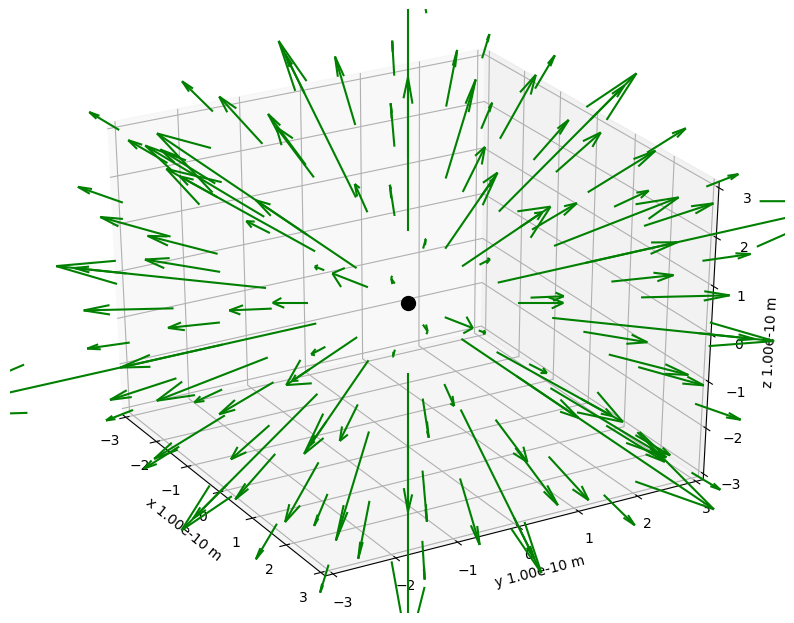

In [6]:
test = charge_system([charge([0,0,0], 1)])
p, v = test.vector_field(resolution = 4)
plot_charges(test,s = 3, positions = p, vectors = v)

Here I was just testing that my vector field function was working using a point charge as the test case. Ignore the error message; it just means that the vector being calcualted at (0,0,0) was discounted.

Finite line charge
-----------------
Below I was just testing that my vector field function was working using a point charge as the test case. 

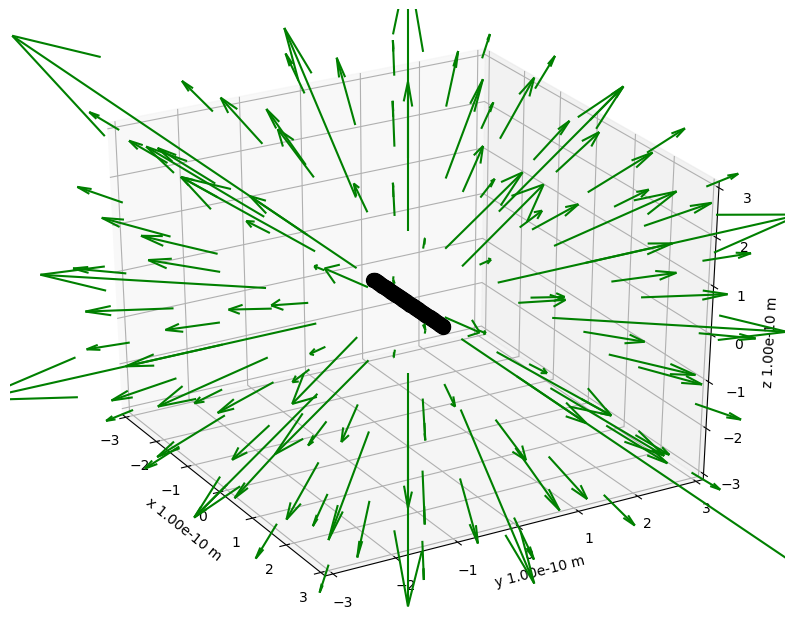

In [7]:
def line_charge(**kwargs):
    l, n, q = kwargs.get("l", 1), kwargs.get("n", 100), kwargs.get("q", 1)
    points = linspace(-l, l, n).tolist()
    return charge_system([charge([i,0,0], 1/n) for i in points])
line_system = line_charge()
p, v = line_system.vector_field(resolution = 4)
plot_charges(line_system,s = 3, positions = p, vectors = v)

Electric field at distance Z from the line charge. I realise that I already did this task for the ring of charges when it wasn't required but hey if I did it once I can just do it again I guess. Here the line is 2 angstroms long with a charge of 1e C. The graphs are pretty close in value so I'll take it. Interestingly, they show more of a deviation from one another than the electric field for the charged ring. Let's try increasing hte number of charges in the line. No change. Alright.

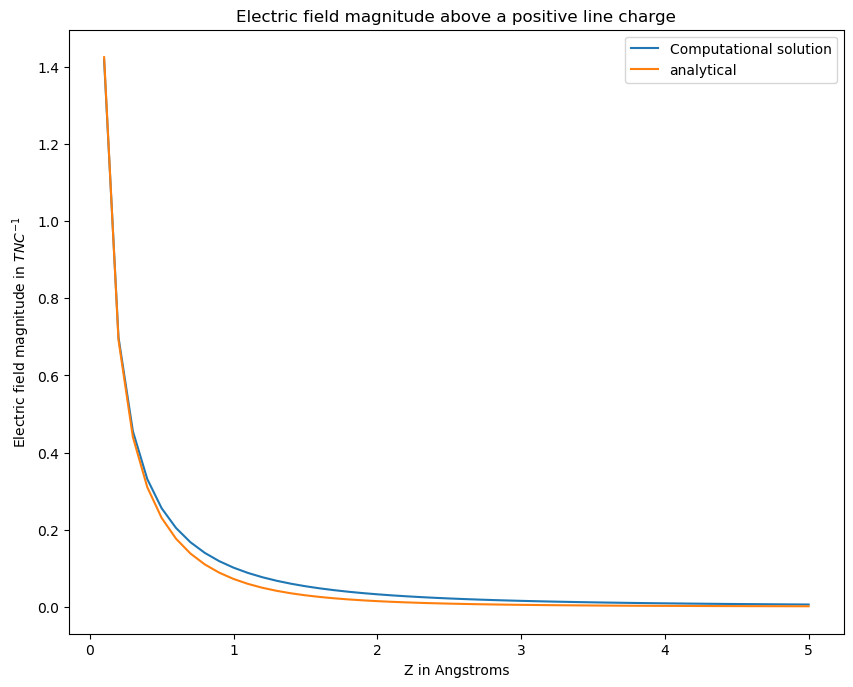

In [8]:
z_value = linspace(0.1, 5, 50)
e_analytical = lambda z: 1.6021765653e-19*1e-10/(4*pi*e0*z*(1e-20+z**2))
e_field = array([line_system.electric_field([0,0,i])[1] for i in z_value])*1e-12
plt.plot(z_value, e_field, label = "Computational solution")  
plt.plot(z_value, e_analytical(z_value*1e-10)*1e-12, label = "analytical") 
plt.ylabel("Electric field magnitude in $TNC^{-1}$"), plt.xlabel("Z in Angstroms")
plt.title("Electric field magnitude above a positive line charge")
plt.legend()

Ok time to plot the potential above the line charge for z << L. After many attempts integrating the electric field of a line charge and then also integrating for the potential over the whole area of the line charge, I realized that when z << L, you can just approximate the line charge as an infinite line. 

Also, I found the +c from the integration by trial because the value of log(infinity) is just infinity...

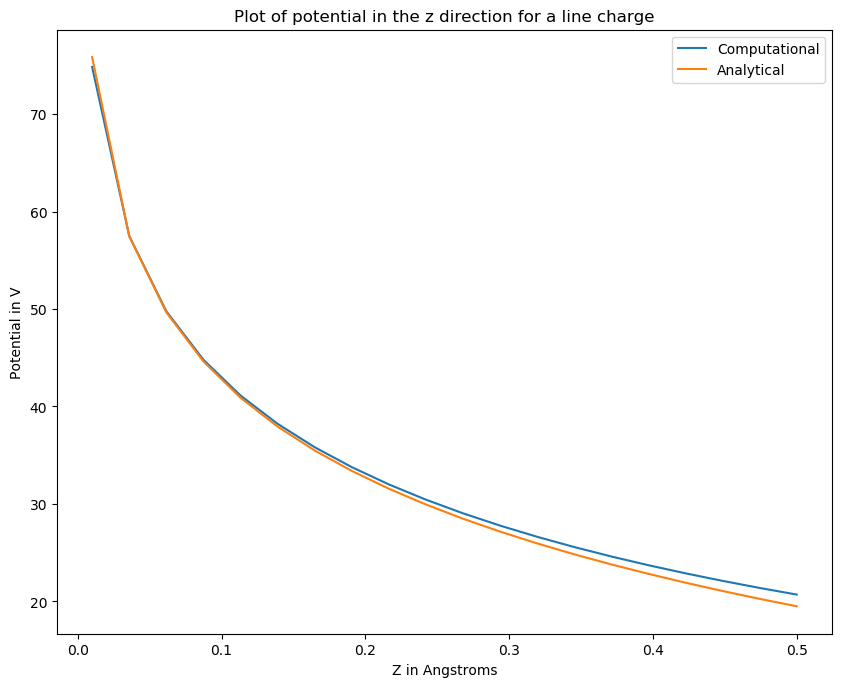

In [9]:
plt.rcParams['figure.figsize']=[10,8]
z_pos = linspace(0.01, 0.5, 20)
pot = [line_system.potential([0,0,z]) for z in z_pos]
pot_analytical = lambda z: -(1.602e-19/(2e-10))/(2*pi*e0)*log(z)-322
plt.plot(z_pos, pot, label = "Computational")
plt.plot(z_pos, pot_analytical(z_pos*1e-10), label = "Analytical")
plt.ylabel("Potential in V"), plt.xlabel("Z in Angstroms")
plt.title("Plot of potential in the z direction for a line charge")
plt.legend()

(Text(0, 0.5, 'Z / A'), Text(0.5, 0, 'X / A'))

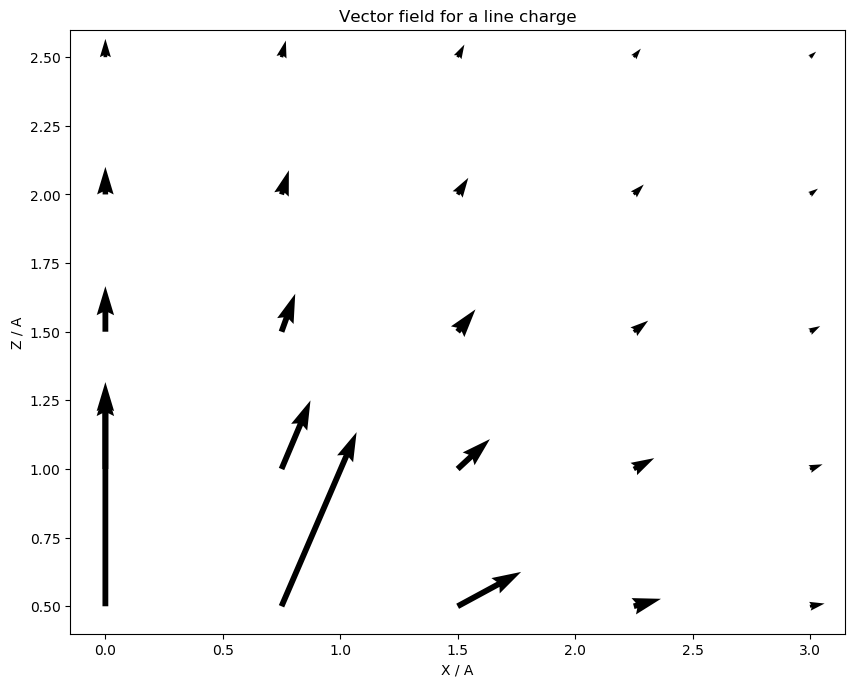

In [10]:
#line_system = charge_system([charge([0,0,0],.5), charge([1,0,0],.5)])
x,z,ex,ez = line_system._2dfield()
fig, ax1t = plt.subplots()
ax1t.quiver(x,z,ex,ez)
plt.title("Vector field for a line charge")
plt.ylabel("Z / A"), plt.xlabel("X / A")

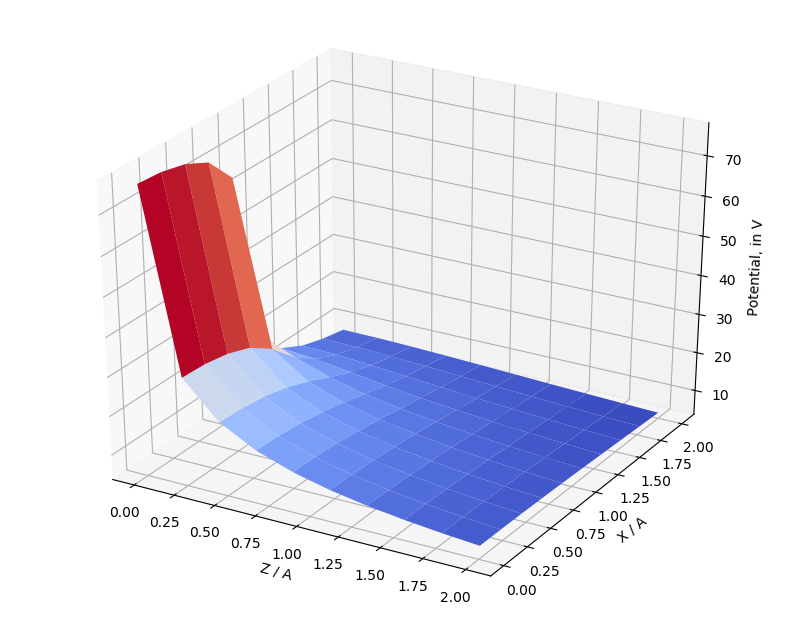

In [11]:
from matplotlib import cm
def surface(line, **kwargs):
    bound, res =   kwargs.get("bound", 2), kwargs.get("res", 10)
    pos = linspace(0.01, bound, res)
    out = [[0 for j in range(res)] for i in range(res)]
    for i in range(res):
        for j in range(res):
            out[i][j] = line.potential([pos[i], 0, pos[j]])
    x, z = meshgrid(pos, pos)
    return x, z, out
x,z, pot = surface(line_system)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.set_xlabel('Z / A')
ax.set_ylabel('X / A')
ax.set_zlabel('Potential, in V')
surf = ax.plot_surface(x, z, array(pot), cmap=cm.coolwarm, linewidth=0, antialiased=True)

plt.show()

Here's a surface plot of the potential in the positive xz plane near the line charge. You can see where the line charge is from the peak in the potential. 

In [3]:
plt.rcParams['figure.figsize']=[5,5]
pos = [random.rand(10)*10-5 for i in range(3)]
water_box = charge_system([])
ri, qi = [], []
for i in range(10):
    water_box.water(centre = [random.random()*10-5, random.random()*10-5, random.random()*10-5], x_angle = random.random()*2*pi, y_angle = random.random()*2*pi, z_angle = random.random()*2*pi)     
x_axis = linspace(-5,5, 50)
potential = [water_box.potential([i,0,0]) for i in x_axis]
@interact(el = (0,180,10), az = (-180, 180, 10))
def view(el = 30, az = 30):
    plt.plot(x_axis, potential)
    plt.ylabel("Potential in V"), plt.xlabel("X in Angstroms")
    plt.title("Plot of potential along x axis")
    plot_charges(water_box, s = 5, azimuth = az, elevation = el)
    plt.plot([-5,5],[0,0],[0,0])
    

interactive(children=(IntSlider(value=30, description='el', max=180, step=10), IntSlider(value=30, description…

Observations of potential in the x axis with respect to the water molecules: Magnitude of potential is larger with water closer to the x axis. Potential is positive with the hydrogens facing the axis, and negative with an oxygen facing the axis.

One time, only one water was close to the axis, with the rest relatively further away. This gave one very large spike. This suggests that potential drops off very quickly with distance, moreso than the 1/r relationship from coulomb's law. 

In [4]:
plt.rcParams['figure.figsize']=[5,5]
hydrated_system = charge_system([charge([0,0,0], 1, colour = "brown")])
for i, j, k, y, z in (2.5,0,0, 0, 0), (0,2.5,0, 0, pi/2), (0,0,2.5, -pi/2, 0), (-2.5,0,0, pi, 0), (0,-2.5,0, 0, -pi/2), (0,0,-2.5, pi/2, 0):
    hydrated_system.water(centre = [i, j, k], x_angle = random.random()*2*pi, y_angle = y, z_angle = z)
@interact(el = (0,180,10), az = (-180, 180, 10))
def view(el = 30, az = 30):
    plot_charges(hydrated_system, s = 3, azimuth = az, elevation = el, title = "random config")

interactive(children=(IntSlider(value=30, description='el', max=180, step=10), IntSlider(value=30, description…

Text(0.5, 1.0, 'Histogram of energies')

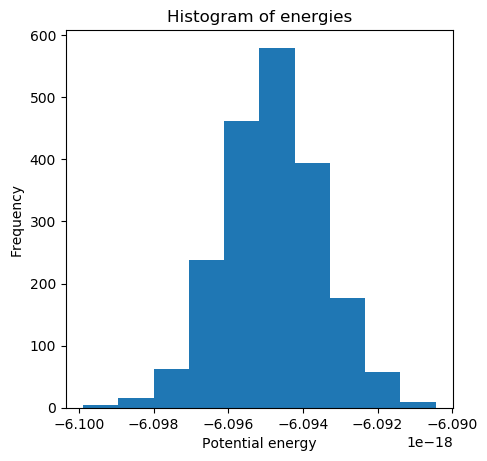

In [5]:
config, energy = [], []
for i in range(2000):
    hydrated_system = charge_system([charge([0,0,0], 1, colour = "brown")])
    for i, j, k, y, z in (2.5,0,0, 0, 0), (0,2.5,0, 0, pi/2), (0,0,2.5, -pi/2, 0), (-2.5,0,0, pi, 0), (0,-2.5,0, 0, -pi/2), (0,0,-2.5, pi/2, 0):
        hydrated_system.water(centre = [i, j, k], x_angle = random.random()*2*pi, y_angle = y, z_angle = z)
    config.append(hydrated_system)
    energy.append(hydrated_system.potential_energy())   
plt.hist(energy)
plt.ylabel("Frequency"), plt.xlabel("Potential energy")
plt.title("Histogram of energies")

In [6]:
plt.rcParams['figure.figsize']=[5,5]
@interact(el = (0,180,10), az = (-180, 180, 10))
def view(el = 30, az = 30):
    plot_charges(config[energy.index(min(energy))], s = 3, azimuth = az, elevation = el, title = "Lowest energy configuration")

interactive(children=(IntSlider(value=30, description='el', max=180, step=10), IntSlider(value=30, description…

I decided to fix the water molecules with the hydrogens facing away from the sodium and only rotate the waters about their principle C2. I did this because: 1. Writing code to give the water molecules 3 degrees of freedom would have required a re-write using quaternions, or having a different order of roation matrices for each molecule which would have been a pain. 2. I can already infer that the lowest energy configuration would be with the oxygen facing the sodium as this maximises the nagative electric field experienced by the positive soidum ion. 3. Jonathon said it would be fine to do it this way.

The lowest energy configuration has the hydrogens staggered. This maximises the average distance between hydrogens which repel, therefore minimising energy. Interestingly, 

Electric double layer at an electrode
------------------
Alright so the plate is way bigger than the scale I'm working at so the electric field is going to be approxomately equal to that of an infinite charged sheet.
I guess that I'll just define a function E(z) above the charged plate and add that on to the vector due to the water. I chose 100 angstroms with 30 water molecules along each axis as this gives the upper bound of average oxygen - oxygen distance in water.
E due to the electrode is $\frac{\rho}{e_0}$ where $\rho$ is the charge density per unit area. This means that we see a vector addition to all of the vectors due to the water molecules upwards. Further from the water, we see little affect from the water and the electric field becomes equal to that of an isolated charged plate.

I chose the charge density of the plate to be $10^{-2} Cm^{-2}$, as this gives an electric field with a similar order of magnitude to that created by the water close to the plate, so that one can observe the vector addition between the two.

Done
Runtime = 4.094e+00 s


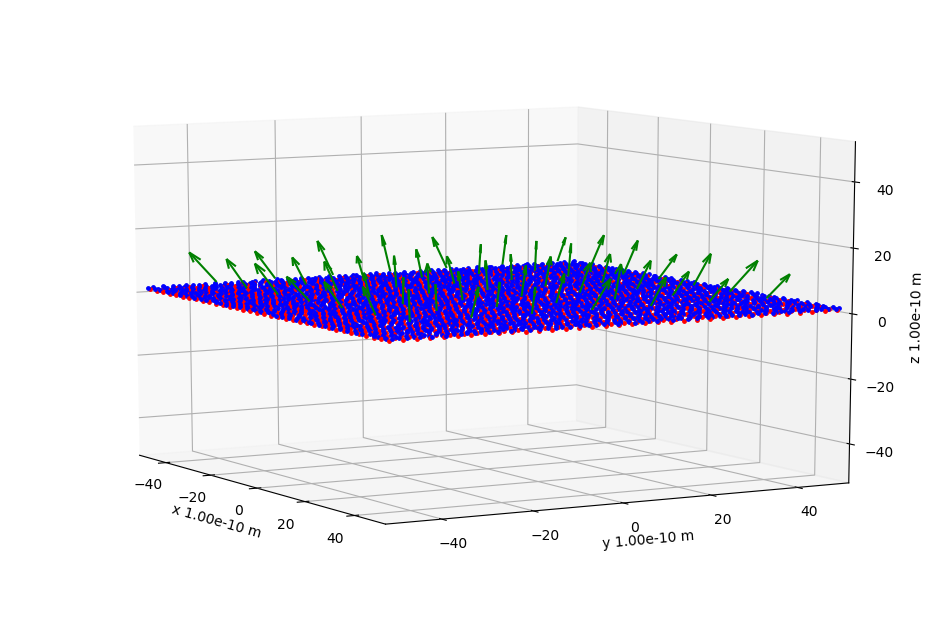

In [7]:
import timeit
start = timeit.default_timer()
plt.rcParams['figure.figsize']=[12,8]
size = linspace(-50,50,35)
E = array([0,0,1e-2/(2*e0)])
plate_system = charge_system([])
[[plate_system.water(centre = [i,j,1], y_angle = -pi/2, x_angle = random.random()*2*pi)for i in size]for j in size]
pv, ev = plate_system.vector_field(size = 40, resolution = 6, centre = [0,0,0], vector_scale = 1, surface = True)
ev = [(i+E)*1e-9 for i in ev]
plot_charges(plate_system, s = 50, atom_size =  6, positions = pv, vectors = ev, elevation = 10)
print("Done\nRuntime = " + "%.3e" % (timeit.default_timer()-start) + " s")

In [17]:
print("E 3 A above the plate is " + "%.3e" % (plate_system.electric_field([0,0,3])[1]+E[2])+ " N/C")
print("E 1000 A above the plate is " + "%.3e" % (plate_system.electric_field([0,0,1000])[1]+E[2])+ " N/C")
print("E due to the isolated plate =" ,"%.3e" % E[2] + " N/C")

E 3 A above the plate is 9.400e+09 N/C
E 1000 A above the plate is 5.779e+08 N/C
E due to the isolated plate = 5.647e+08 N/C


Surface with ions
----------------

Low concentrations of ions (-1e C) around 1% by number have little effect on the net electric field above the surface. Higher percentages around 5% noticably reduce the vertical components of the vectors close to the surface, and 15% or higher concentrations cause the electic field near the surface to be negative / downwards as the charge density of the ions outweighs that of the surface, when  measuring 4 A above the surface. Try varying the ion_fraction parameter and running the code.

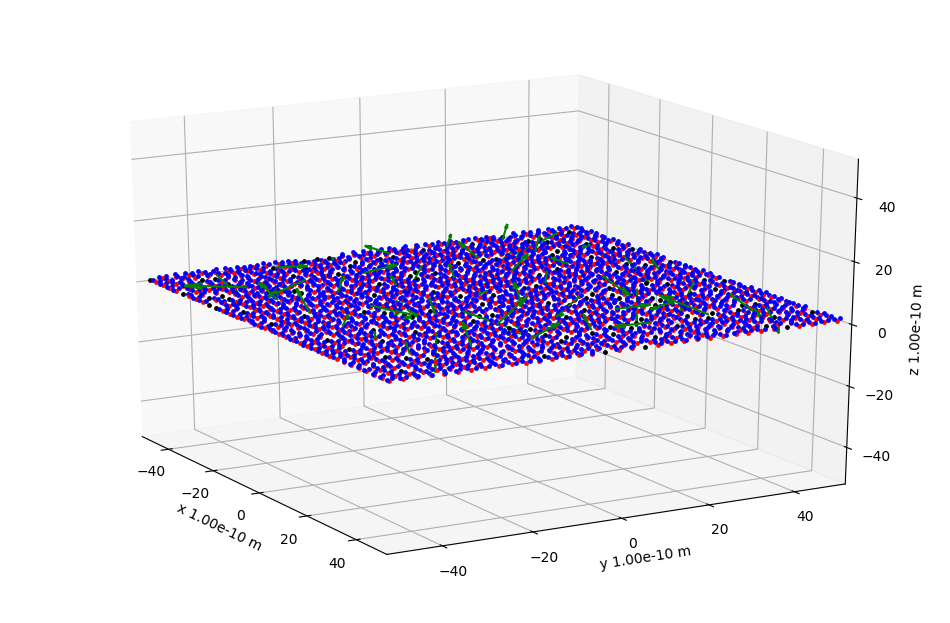

In [8]:
ion_fraction = 0.1

plt.rcParams['figure.figsize']=[12,8]
size = linspace(-50,50,35)
E = array([0,0,1e-2/(2*e0)]) #electric field due to electrode 
plate_system = charge_system([])
for j in size:
    for i in size:
        if random.random() < ion_fraction:
            plate_system.charges.append(charge([i,j,1], -1))
        else:
            plate_system.water(centre = [i,j,1], y_angle = -pi/2, x_angle = random.random()*2*pi)
pv, ev = plate_system.vector_field(size = 40, resolution = 6, centre = [0,0,0], vector_scale = 1, surface = True)
ev = [(i+E)*1e-9 for i in ev]
plot_charges(plate_system, s = 50, atom_size =  6, positions = pv, vectors = ev, elevation = 20)